# Effects of Snowfall and Rainfall on Temperature

This project aims to show the effects of snowfall and rainfall on temperature by plotting the average temperatures and the snowfall and rainfall data for two weather stations in Ann Arbor University of Michigan, MI and NY City Central Park, NY for a period of 20 years ranging from 2001-01-01 to 2020-01-01 using data provided by https://www.ncdc.noaa.gov/

The idea behind choosing two geographically different weather stations is to show that the weather pattern is not constricted to any one place.

In [187]:
import pandas as pd
import numpy as np

df_ny = pd.read_csv('weather_ny.csv')
df_mi = pd.read_csv('weather_mi.csv')

df_ny_copy = df_ny.copy()
df_mi_copy = df_mi.copy()

In [188]:
df_ny.head()

,STATION,NAME,DATE,PRCP,SNOW,TAVG,TMAX,TMIN
0,USW00094728,"NY CITY CENTRAL PARK, NY US",2000-01,3.22,9.5,31.3,37.8,24.7
1,USW00094728,"NY CITY CENTRAL PARK, NY US",2000-02,1.66,5.2,37.3,43.7,30.9
2,USW00094728,"NY CITY CENTRAL PARK, NY US",2000-03,3.34,0.4,47.2,55.0,39.4
3,USW00094728,"NY CITY CENTRAL PARK, NY US",2000-04,3.53,1.2,51.0,58.2,43.8
4,USW00094728,"NY CITY CENTRAL PARK, NY US",2000-05,4.50,0.0,63.5,71.7,55.4


In [189]:
df_mi.head()

,STATION,NAME,DATE,PRCP,SNOW,TAVG,TMAX,TMIN
0,USC00200230,"ANN ARBOR U OF MICH, MI US",2000-01,1.96,16.1,24.2,32.2,16.1
1,USC00200230,"ANN ARBOR U OF MICH, MI US",2000-02,1.71,12.8,32.4,40.3,24.6
2,USC00200230,"ANN ARBOR U OF MICH, MI US",2000-03,1.31,0.8,43.3,53.6,33.1
3,USC00200230,"ANN ARBOR U OF MICH, MI US",2000-04,3.35,2.5,48.3,59.2,37.4
4,USC00200230,"ANN ARBOR U OF MICH, MI US",2000-05,5.58,0.0,61.7,72.5,51.0


## Cleaning data

Removing station ID and name

In [190]:
df_ny.drop(['STATION', 'NAME'], axis=1, inplace=True)
df_mi.drop(['STATION', 'NAME'], axis=1, inplace=True)

Converting date to numpy date

In [191]:
df_ny['DATE'] = pd.to_datetime(df_ny['DATE'])
df_mi['DATE'] = pd.to_datetime(df_mi['DATE'])

Removing TMIN and TMAX (we are only interested in the average temperature)

In [192]:
df_ny.drop(['TMIN', 'TMAX'], axis=1, inplace=True)
df_mi.drop(['TMIN', 'TMAX'], axis=1, inplace=True)

In [193]:
df_ny.head()

,DATE,PRCP,SNOW,TAVG
0,2000-01-01,3.22,9.5,31.3
1,2000-02-01,1.66,5.2,37.3
2,2000-03-01,3.34,0.4,47.2
3,2000-04-01,3.53,1.2,51.0
4,2000-05-01,4.50,0.0,63.5


In [194]:
df_mi.head()

,DATE,PRCP,SNOW,TAVG
0,2000-01-01,1.96,16.1,24.2
1,2000-02-01,1.71,12.8,32.4
2,2000-03-01,1.31,0.8,43.3
3,2000-04-01,3.35,2.5,48.3
4,2000-05-01,5.58,0.0,61.7


## Manipulating data

Grouping data on monthly basis by taking mean

In [195]:
df_mi['MONTH'] = df_mi['DATE'].dt.month
df_mi = df_mi.groupby(by='MONTH').mean()

df_ny['MONTH'] = df_ny['DATE'].dt.month
df_ny = df_ny.groupby(by='MONTH').mean()

In [196]:
df_mi.head()

,PRCP,SNOW,TAVG
MONTH,,,
1,2.827143,17.595238,25.400
2,2.709500,17.115000,27.300
3,2.715000,7.535000,37.130
4,3.361000,2.515000,49.315
5,4.394500,0.013333,60.445


In [197]:
df_ny.head()

,PRCP,SNOW,TAVG
MONTH,,,
1,3.326667,9.666667,33.352381
2,3.276000,10.950000,35.475000
3,4.173000,4.730000,42.735000
4,4.284000,0.540000,53.845000
5,4.239000,0.000000,63.235000


## Visualizing data

In [204]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib notebook

<IPython.core.display.Javascript object>


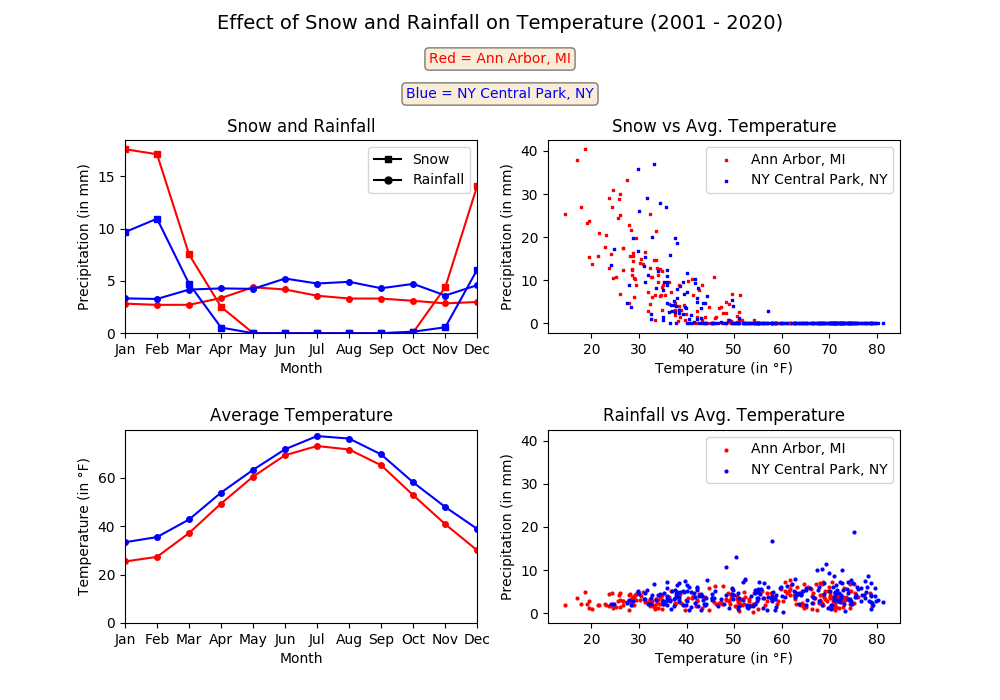

In [208]:
plt.figure(figsize=(10, 7))
plt.subplots_adjust(hspace=0.5, top=0.8)

ax1 = plt.subplot(2, 2, 1)
plt.plot(df_mi['SNOW'], '-s', c='red', ms=4)
plt.plot(df_mi['PRCP'], '-o', c='red', ms=4)
plt.plot(df_ny['SNOW'], '-s', c='blue', ms=4)
plt.plot(df_ny['PRCP'], '-o', c='blue', ms=4)
snow = mlines.Line2D([], [], color='k', marker='s', markersize=5, label='Snow')
rain = mlines.Line2D([], [], color='k', marker='o', markersize=5, label='Rainfall')
ax1.legend(handles=[snow, rain])
ax1.set_xticks(np.arange(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax1.set_ylim(bottom=0)
ax1.set_xlim([1, 12])
plt.title('Snow and Rainfall')
plt.xlabel('Month')
plt.ylabel('Precipitation (in mm)')

ax2 = plt.subplot(2, 2, 3, sharex=ax1)
plt.plot(df_mi['TAVG'], '-o', c='red', ms=4)
plt.plot(df_ny['TAVG'], '-o', c='blue', ms=4)
ax2.set_xticks(np.arange(1, 13))
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax2.set_ylim(bottom=0)
ax2.set_xlim([1, 12])
plt.title('Average Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (in °F)')

ax3 = plt.subplot(2, 2, 2)
plt.scatter(x=df_mi_copy['TAVG'], y=df_mi_copy['SNOW'], s=4, c='red', marker='s')
plt.scatter(x=df_ny_copy['TAVG'], y=df_ny_copy['SNOW'], s=4, c='blue', marker='s')
ax3.legend(['Ann Arbor, MI', 'NY Central Park, NY'])
plt.title('Snow vs Avg. Temperature')
plt.ylabel('Precipitation (in mm)')
plt.xlabel('Temperature (in °F)')

ax4 = plt.subplot(2, 2, 4, sharex=ax3, sharey=ax3)
plt.scatter(x=df_mi_copy['TAVG'], y=df_mi_copy['PRCP'], s=4, c='red')
plt.scatter(x=df_ny_copy['TAVG'], y=df_ny_copy['PRCP'], s=4, c='blue')
ax4.legend(['Ann Arbor, MI', 'NY Central Park, NY'])
plt.title('Rainfall vs Avg. Temperature')
plt.ylabel('Precipitation (in mm)')
plt.xlabel('Temperature (in °F)')

fig = plt.gcf()
fig.suptitle('Effect of Snow and Rainfall on Temperature (2001 - 2020)', fontsize=14)
plt.text(0.5, 0.91, 'Red = Ann Arbor, MI', transform=fig.transFigure, color='red', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), horizontalalignment='center')
plt.text(0.5, 0.86, 'Blue = NY Central Park, NY', transform=fig.transFigure, color='blue', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), horizontalalignment='center')